In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/students-performance-in-exams/StudentsPerformance.csv


In [2]:
df=pd.read_csv("/kaggle/input/students-performance-in-exams/StudentsPerformance.csv")
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


## Data Analysis and Visualizations

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [4]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
math score,1000.0,66.089,15.163080,0.0,57.00,66.0,77.0,100.0
reading score,1000.0,69.169,14.600192,17.0,59.00,70.0,79.0,100.0
writing score,1000.0,68.054,15.195657,10.0,57.75,69.0,79.0,100.0


In [6]:
df.describe(include="object")

,gender,race/ethnicity,parental level of education,lunch,test preparation course
count,1000,1000,1000,1000,1000
unique,2,5,6,2,2
top,female,group C,some college,standard,none
freq,518,319,226,645,642


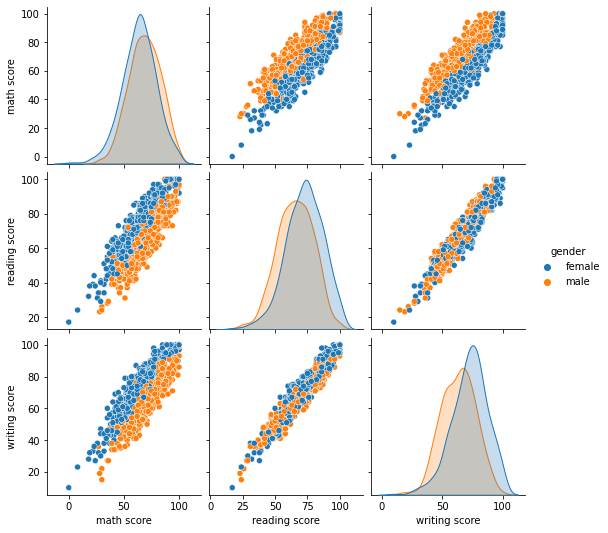

In [7]:
sns.pairplot(df, hue="gender")
plt.show()

In [8]:
df_categorical=["gender", "race/ethnicity", "parental level of education","lunch", "test preparation course"]
for i in df_categorical:
    print("-------------------------------")
    print("Value Counts of  {}." .format( df[i].value_counts()))

-------------------------------
Value Counts of  female    518
male      482
Name: gender, dtype: int64.
-------------------------------
Value Counts of  group C    319
group D    262
group B    190
group E    140
group A     89
Name: race/ethnicity, dtype: int64.
-------------------------------
Value Counts of  some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental level of education, dtype: int64.
-------------------------------
Value Counts of  standard        645
free/reduced    355
Name: lunch, dtype: int64.
-------------------------------
Value Counts of  none         642
completed    358
Name: test preparation course, dtype: int64.


In [9]:
df["average"]=df[["math score", "reading score", "writing score"]].mean(axis=1)
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333


##### Gender and Race/Ethnicity

<AxesSubplot:xlabel='race/ethnicity', ylabel='average'>

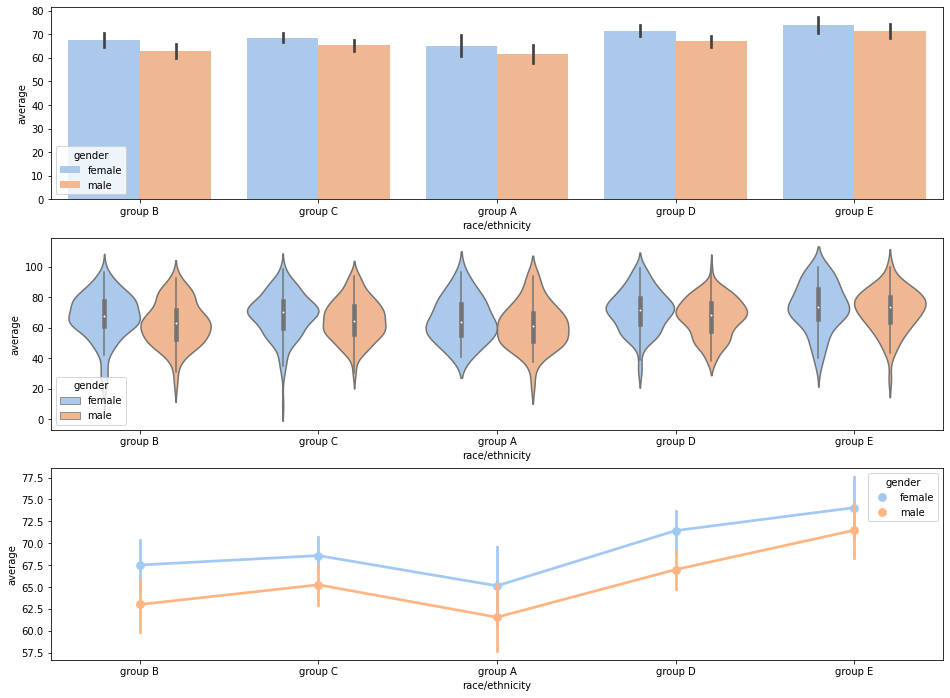

In [10]:
fig, axis=plt.subplots(3, figsize=(16,12))
sns.set_palette("pastel")

sns.barplot(data=df, x=df["race/ethnicity"], y=df["average"], hue=df["gender"], ax=axis[0])
sns.violinplot(data=df, x=df["race/ethnicity"], y=df["average"], hue=df["gender"],ax=axis[1])
sns.pointplot(data=df, x=df["race/ethnicity"], y=df["average"], hue=df["gender"],ax=axis[2])

##### Gender and Lunch

<AxesSubplot:xlabel='lunch', ylabel='average'>

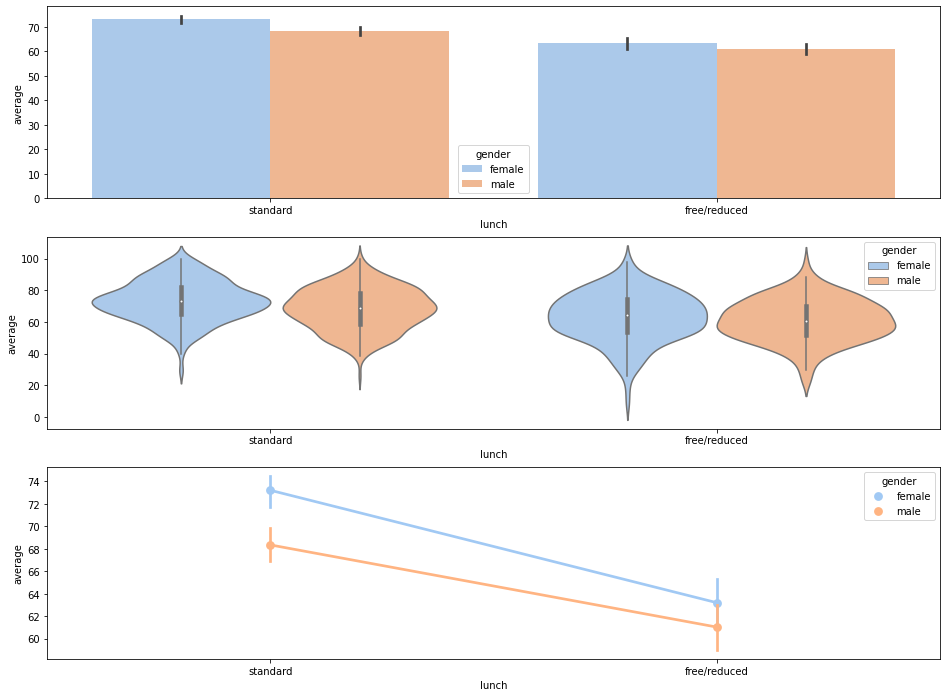

In [11]:
fig, axis=plt.subplots(3, figsize=(16,12))
sns.set_palette("pastel")

sns.barplot(data=df, x=df["lunch"], y=df["average"], hue=df["gender"], ax=axis[0])
sns.violinplot(data=df, x=df["lunch"], y=df["average"], hue=df["gender"],ax=axis[1])
sns.pointplot(data=df, x=df["lunch"], y=df["average"], hue=df["gender"],ax=axis[2])

##### Gender and Parental Level Education

<AxesSubplot:xlabel='parental level of education', ylabel='average'>

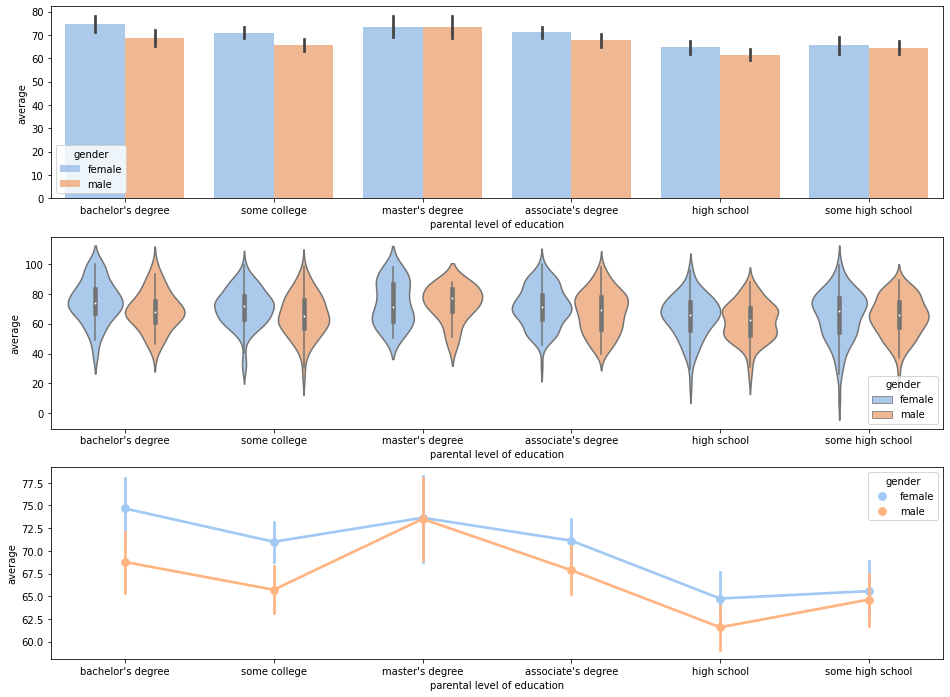

In [12]:
fig, axis=plt.subplots(3, figsize=(16,12))
sns.set_palette("pastel")

sns.barplot(data=df, x=df["parental level of education"], y=df["average"], hue=df["gender"], ax=axis[0])
sns.violinplot(data=df, x=df["parental level of education"], y=df["average"], hue=df["gender"],ax=axis[1])
sns.pointplot(data=df, x=df["parental level of education"], y=df["average"], hue=df["gender"],ax=axis[2])

##### Gender and Test Preparation Course

<AxesSubplot:xlabel='test preparation course', ylabel='average'>

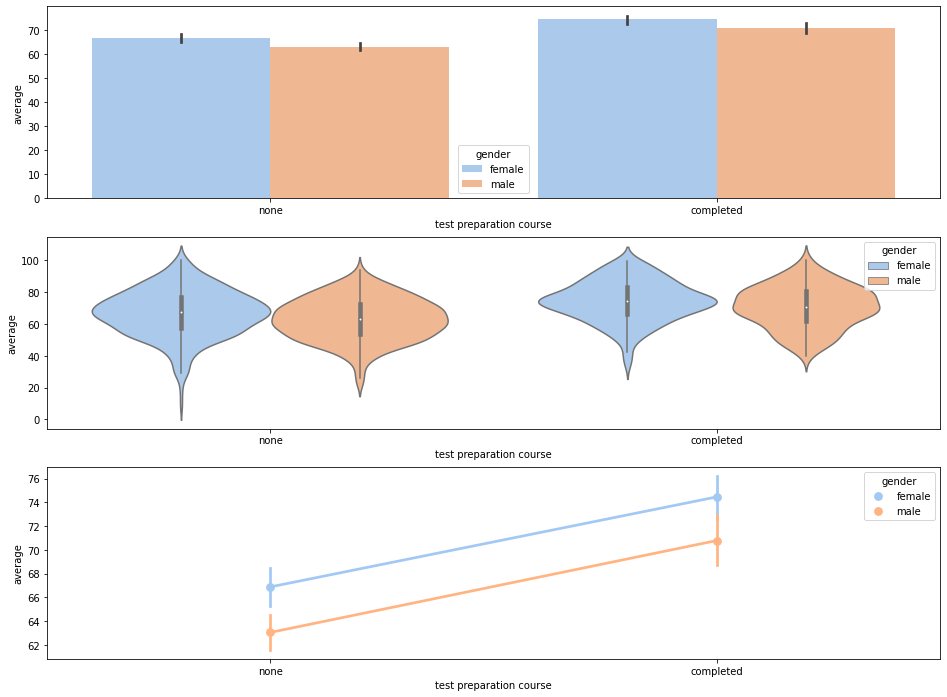

In [13]:
fig, axis=plt.subplots(3, figsize=(16,12))
sns.set_palette("pastel")

sns.barplot(data=df, x=df["test preparation course"], y=df["average"], hue=df["gender"], ax=axis[0])
sns.violinplot(data=df, x=df["test preparation course"], y=df["average"], hue=df["gender"],ax=axis[1])
sns.pointplot(data=df, x=df["test preparation course"], y=df["average"], hue=df["gender"],ax=axis[2])

****What we can understand from these graphs is that:
   1-Parental level of education and race/ethnicity has low impact for average grade.
   2-Females are much more succesful than males in every situtation.****

##### We need a new column for our prediction model

In [14]:
def NewGrade(AverageScore):
    if (AverageScore>=80): return "A"
    if (AverageScore>=70): return "B"
    if (AverageScore>=60): return "C"
    if (AverageScore>=50): return "D"
    if (AverageScore>=40): return "E"
    else: return "F"
df["grade"]=df.apply(lambda x: NewGrade(x["average"]),axis=1)

##### Analysis of the new  column

<AxesSubplot:xlabel='grade', ylabel='count'>

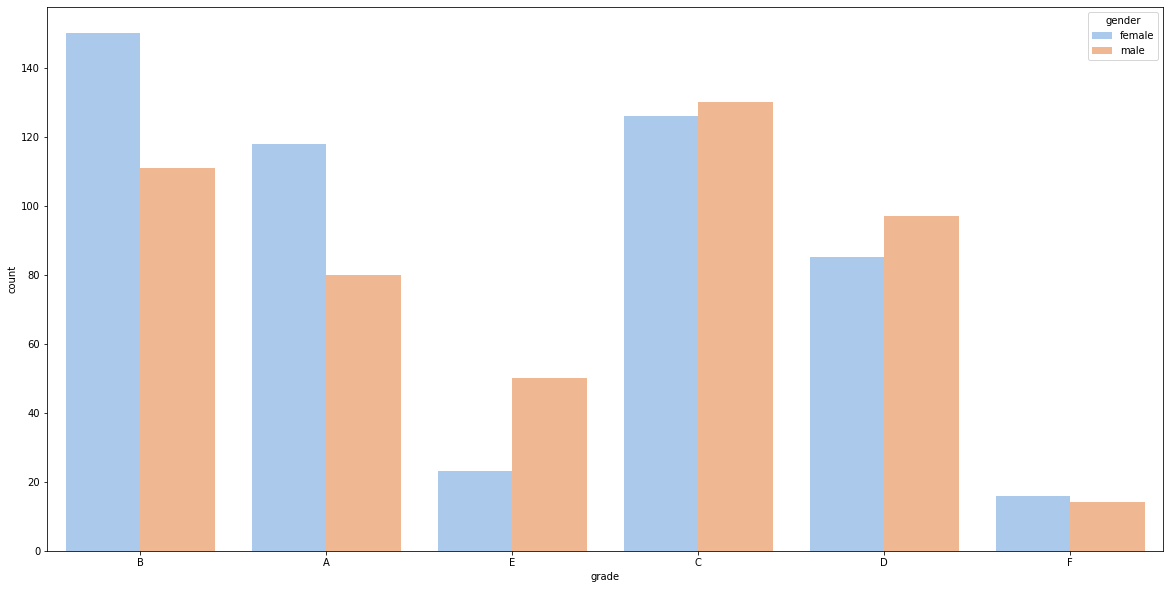

In [15]:
plt.figure(figsize=(20,10))
sns.set_palette("pastel")
sns.countplot(data=df, x=df["grade"], hue=df["gender"])

In [16]:
fig=px.histogram(df["grade"], color=df["gender"])
fig.show()

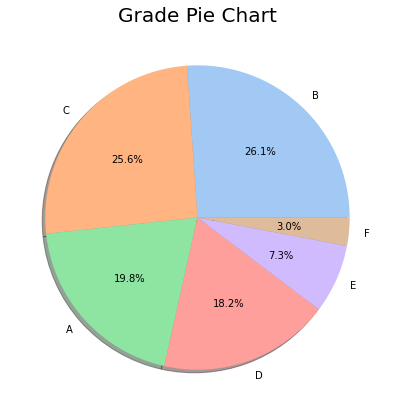

In [17]:
plt.figure(figsize=(7,7))
plt.pie(df["grade"].value_counts().values,
       labels=df["grade"].value_counts().index,
       autopct="%1.1f%%",
       shadow=True)
plt.title("Grade Pie Chart", color="Black",fontsize=20)
plt.show()

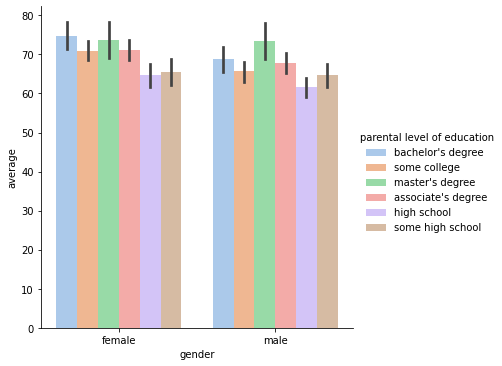

In [18]:
sns.catplot(data=df,x="gender",y="average",hue="parental level of education"
            ,kind="bar",height=5)

In [19]:
df_numerical=["math score", "reading score", "writing score", "average"]
for i in df_numerical:
    a=df[i].value_counts().reset_index()
    a.rename(columns={"index":i, i:"count"},inplace=True)
    fig=px.bar(a, x=i, y="count", color="count")
    fig.show()

In [20]:
df["total_score"]=df["math score"]+df["reading score"]+df["writing score"]
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average,grade,total_score
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667,B,218
1,female,group C,some college,standard,completed,69,90,88,82.333333,A,247
2,female,group B,master's degree,standard,none,90,95,93,92.666667,A,278
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333,E,148
4,male,group C,some college,standard,none,76,78,75,76.333333,B,229


/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='total_score', ylabel='Density'>

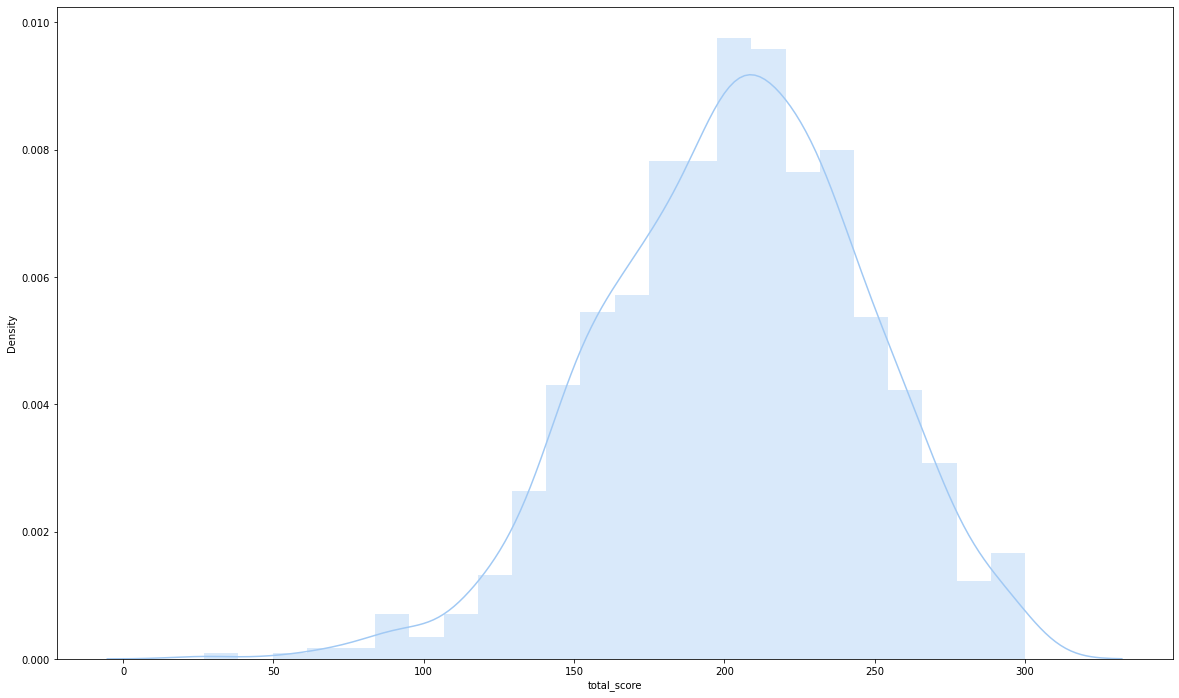

In [21]:
plt.figure(figsize=(20,12))
sns.distplot(df["total_score"])

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='average', ylabel='Density'>

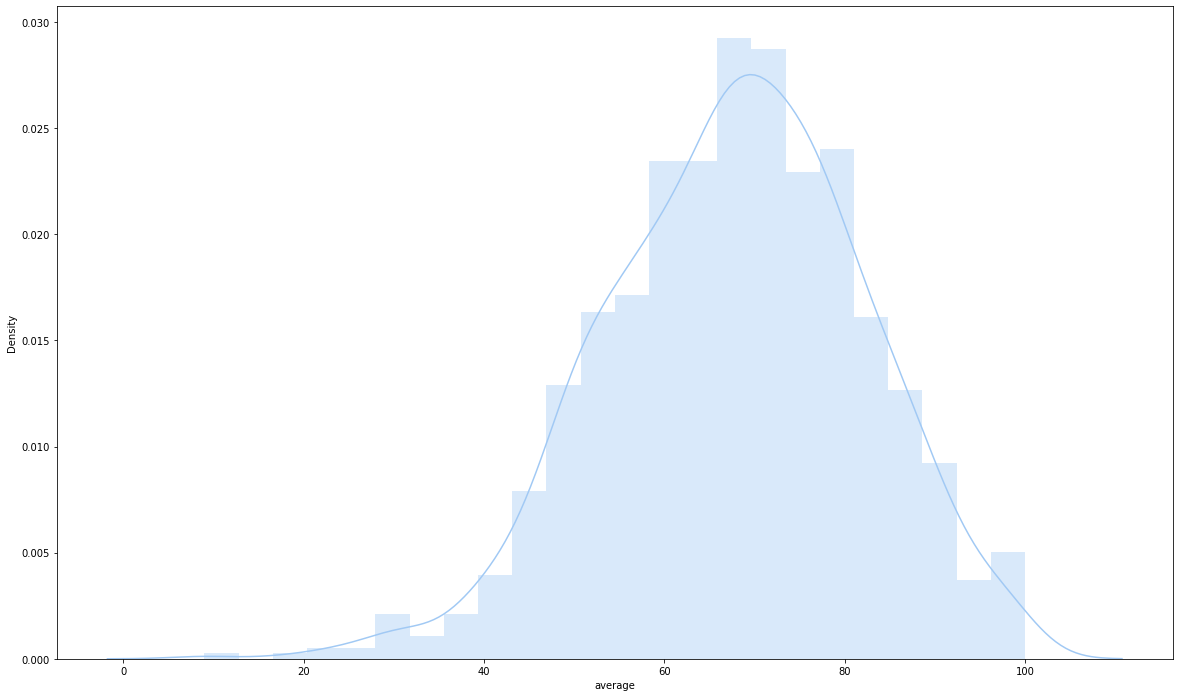

In [22]:
plt.figure(figsize=(20,12))
sns.distplot(df["average"])

## Model Prepeation

##### Label Encoding

In [23]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

for i in df_categorical:
    df[i]=le.fit_transform(df[i])
    

In [24]:
df["grade"]=le.fit_transform(df["grade"])

In [25]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average,grade,total_score
0,0,1,1,1,1,72,72,74,72.666667,1,218
1,0,2,4,1,0,69,90,88,82.333333,0,247
2,0,1,3,1,1,90,95,93,92.666667,0,278
3,1,0,0,0,1,47,57,44,49.333333,4,148
4,1,2,4,1,1,76,78,75,76.333333,1,229


<AxesSubplot:>

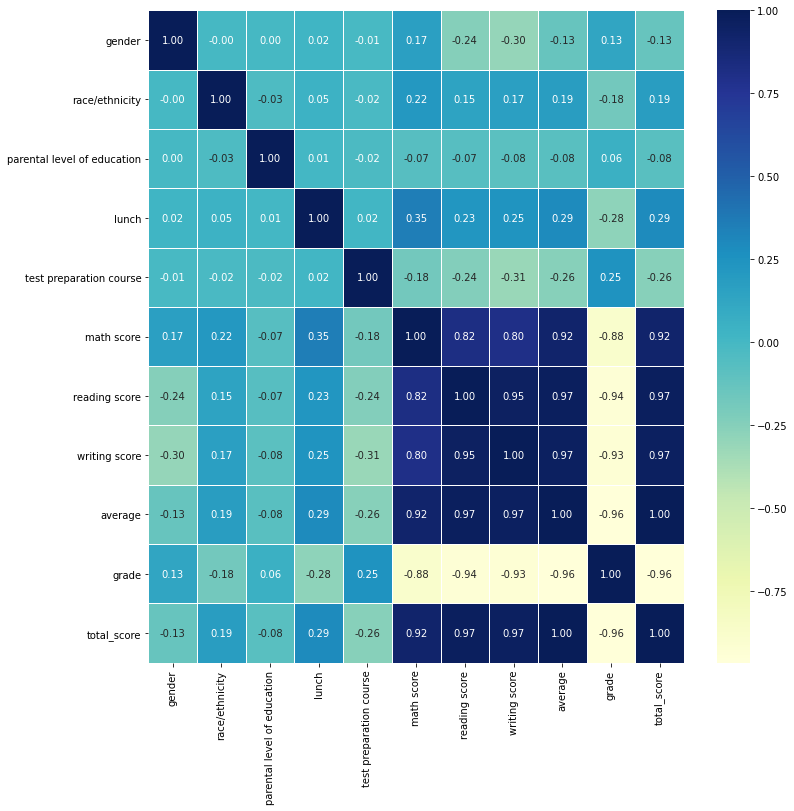

In [26]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(),annot=True
           ,linewidths=0.5
           ,fmt=".2f"
           ,cmap="YlGnBu")

In [27]:
df.drop("total_score",axis=1,inplace=True)

In [28]:
a=df.drop("grade",axis=1).corrwith(df.grade).reset_index()
fig=px.bar(a, x="index",y=0)
fig.show()

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       1000 non-null   int64  
 1   race/ethnicity               1000 non-null   int64  
 2   parental level of education  1000 non-null   int64  
 3   lunch                        1000 non-null   int64  
 4   test preparation course      1000 non-null   int64  
 5   math score                   1000 non-null   int64  
 6   reading score                1000 non-null   int64  
 7   writing score                1000 non-null   int64  
 8   average                      1000 non-null   float64
 9   grade                        1000 non-null   int64  
dtypes: float64(1), int64(9)
memory usage: 78.2 KB


In [30]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average,grade
0,0,1,1,1,1,72,72,74,72.666667,1
1,0,2,4,1,0,69,90,88,82.333333,0
2,0,1,3,1,1,90,95,93,92.666667,0
3,1,0,0,0,1,47,57,44,49.333333,4
4,1,2,4,1,1,76,78,75,76.333333,1


## Model for Student Performance Prediction

In [31]:
x=df.drop("grade",axis=1)
y=df["grade"]
print(x.shape)
print(y.shape)

(1000, 9)
(1000,)


In [32]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33, random_state=25)

In [33]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(670, 9)
(330, 9)
(670,)
(330,)


#### Standard Scaler

In [34]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x_train=ss.fit_transform(x_train)
x_test=ss.transform(x_test)

#### Logistic Regression

In [35]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train, y_train)
y_pred=lr.predict(x_test)
print("Training Accuracy :", lr.score(x_train, y_train)*100)
print("Testing Accuracy :", lr.score(x_test, y_test)*100)

Training Accuracy : 96.56716417910448
Testing Accuracy : 92.42424242424242


In [36]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, y_pred)

print(cm)

[[65  5  0  0  0  0]
 [ 1 73  3  0  0  0]
 [ 0  1 78  1  0  0]
 [ 0  0  7 62  1  0]
 [ 0  0  0  5 20  0]
 [ 0  0  0  0  1  7]]


#### KNN

In [37]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
knn=KNeighborsClassifier(n_neighbors=1,metric="minkowski")
knn.fit(x_train,y_train)

y_pred=knn.predict(x_test)
cm=confusion_matrix(y_test,y_pred)
print(cm)
print("Training Accuracy :", knn.score(x_train, y_train)*100)
print("Testing Accuracy :", knn.score(x_test, y_test)*100)

[[59 11  0  0  0  0]
 [ 7 64  6  0  0  0]
 [ 0  9 62  9  0  0]
 [ 0  0 11 54  5  0]
 [ 0  0  0  5 18  2]
 [ 0  0  0  0  1  7]]
Training Accuracy : 100.0
Testing Accuracy : 80.0


#### SVC

In [38]:
from sklearn.svm import SVC
svc=SVC(kernel="poly")
svc.fit(x_train,y_train)

y_pred=svc.predict(x_test)

cm=confusion_matrix(y_test,y_pred)
print(cm)

print("Training Accuracy :", svc.score(x_train, y_train)*100)
print("Testing Accuracy :", svc.score(x_test, y_test)*100)

[[62  8  0  0  0  0]
 [ 1 71  5  0  0  0]
 [ 0  3 75  2  0  0]
 [ 0  0 15 55  0  0]
 [ 0  0  0  4 21  0]
 [ 0  0  0  0  0  8]]
Training Accuracy : 92.98507462686567
Testing Accuracy : 88.48484848484848


#### Gaussian

In [39]:
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
gnb.fit(x_train,y_train)
# Tahmin
y_pred=gnb.predict(x_test)
cm=confusion_matrix(y_test,y_pred)
print(cm)
print("Training Accuracy :", gnb.score(x_train, y_train)*100)
print("Testing Accuracy :", gnb.score(x_test, y_test)*100)

[[63  7  0  0  0  0]
 [ 0 74  3  0  0  0]
 [ 0  1 74  5  0  0]
 [ 0  0  4 62  4  0]
 [ 0  0  0  1 24  0]
 [ 0  0  0  0  0  8]]
Training Accuracy : 95.67164179104478
Testing Accuracy : 92.42424242424242


#### Decision Tree

In [40]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier(criterion="entropy")
dtc.fit(x_train,y_train)
y_pred=dtc.predict(x_test)
cm=confusion_matrix(y_test,y_pred)
print(cm)
print("Training Accuracy :", dtc.score(x_train, y_train)*100)
print("Testing Accuracy :", dtc.score(x_test, y_test)*100)

[[70  0  0  0  0  0]
 [ 0 77  0  0  0  0]
 [ 0  0 80  0  0  0]
 [ 0  0  0 70  0  0]
 [ 0  0  0  0 25  0]
 [ 0  0  0  0  0  8]]
Training Accuracy : 100.0
Testing Accuracy : 100.0


#### Random Forest

In [41]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=10,criterion="entropy")
rfc.fit(x_train,y_train)
y_pred=rfc.predict(x_test)
cm=confusion_matrix(y_test,y_pred)
print(cm)
print("Training Accuracy :", rfc.score(x_train, y_train)*100)
print("Testing Accuracy :", rfc.score(x_test, y_test)*100)

[[70  0  0  0  0  0]
 [ 0 77  0  0  0  0]
 [ 0  0 80  0  0  0]
 [ 0  0  0 70  0  0]
 [ 0  0  0  0 25  0]
 [ 0  0  0  0  0  8]]
Training Accuracy : 100.0
Testing Accuracy : 100.0
